<a href="https://colab.research.google.com/github/YdoUcare-qm/PedestrianDetectionUsingDINO/blob/main/notebooks/Evaluating_PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IDEA-Research/DINO

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 442 (delta 136), reused 96 (delta 96), pack-reused 251 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [2]:
%cd DINO
!pip install -r requirements.txt

/content/DINO
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-jmzo_44x/pycocotools_8ad83c6d83a9472781a41c1e2a8066f1
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-jmzo_44x/pycocotools_8ad83c6d83a9472781a41c1e2a8066f1
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-jmzo_44x/panopticapi_3d6b38b41a4f4f479f193fa9bf789191
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-jmzo_44x/panopticapi_3d6b38b41a4f4f479f193fa9bf789191
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

!gdown --folder https://drive.google.com/drive/folders/1DCpmo919b7OrAng9clEbiMHjO3D0hyoa?usp=sharing

Retrieving folder contents
Processing file 1Ae4OC9uy_7bCy1Wd30gzOK3OPh0Ok92l Pedestrian_dataset_for_internship_assignment.zip
Processing file 1HVeSR3vo-UA9sd6jOJI5viN5e927gk7Y random_sample_mavi_2_gt.json
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1Ae4OC9uy_7bCy1Wd30gzOK3OPh0Ok92l
From (redirected): https://drive.google.com/uc?id=1Ae4OC9uy_7bCy1Wd30gzOK3OPh0Ok92l&confirm=t&uuid=2786c737-3527-44be-908f-629be27d3b8a
To: /content/DINO/Dataset_for_CV_intern_Assignment/Pedestrian_dataset_for_internship_assignment.zip
100% 26.3M/26.3M [00:00<00:00, 71.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HVeSR3vo-UA9sd6jOJI5viN5e927gk7Y
To: /content/DINO/Dataset_for_CV_intern_Assignment/random_sample_mavi_2_gt.json
100% 244k/244k [00:00<00:00, 3.71MB/s]
Download completed


In [5]:
import zipfile
import os

# Path to the downloaded zip file in Google Drive
zip_path = '/content/DINO/Dataset_for_CV_intern_Assignment/Pedestrian_dataset_for_internship_assignment.zip'
extract_path = '/content/drive/MyDrive/CVProject/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the files are extracted
print(os.listdir(extract_path))


['checkpoint0011_4scale.pth', 'rawdata', 'dataset', 'Pedestrian_dataset_for_internship_assignment', '__MACOSX']


In [6]:
import os
import json
import shutil
from sklearn.model_selection import train_test_split

# Path to the directory where the extracted images are located
img_dir = '/content/drive/MyDrive/CVProject/Pedestrian_dataset_for_internship_assignment'  # Adjust the path accordingly
img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]

# Split the dataset: 80% for training, 20% for validation
train_files, val_files = train_test_split(img_files, test_size=0.2, random_state=42)

# Create directories to store the split data in COCO format
base_dir = '/content/drive/MyDrive/CVProject/dataset/'
train_dir = os.path.join(base_dir, 'train/')
val_dir = os.path.join(base_dir, 'val/')
annotations_dir = os.path.join(base_dir, 'annotations/')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(annotations_dir, exist_ok=True)

# Move image files to the respective directories
for file in train_files:
    shutil.move(os.path.join(img_dir, file), os.path.join(train_dir, file))

for file in val_files:
    shutil.move(os.path.join(img_dir, file), os.path.join(val_dir, file))

# Load existing COCO-style JSON annotations
with open('/content/DINO/Dataset_for_CV_intern_Assignment/random_sample_mavi_2_gt.json') as f:  # Adjust path to your JSON file
    coco_annotations = json.load(f)

# Filter annotations for train and val sets
def filter_annotations(coco_data, img_files, output_file):
    images = []
    annotations = []
    img_ids = set()

    for img in coco_data['images']:
        if img['file_name'] in img_files:
            images.append(img)
            img_ids.add(img['id'])

    for ann in coco_data['annotations']:
        if ann['image_id'] in img_ids:
            annotations.append(ann)

    return {"images": images, "annotations": annotations, "categories": coco_data['categories']}

# Create train and validation annotations
train_annotations = filter_annotations(coco_annotations, train_files, 'train')
val_annotations = filter_annotations(coco_annotations, val_files, 'val')

# Save the filtered annotations to JSON files
with open(os.path.join(annotations_dir, 'instances_train2017.json'), 'w') as f:
    json.dump(train_annotations, f)

with open(os.path.join(annotations_dir, 'instances_val2017.json'), 'w') as f:
    json.dump(val_annotations, f)

print("Dataset split and COCO format creation completed!")


Dataset split and COCO format creation completed!


In [7]:
!pip install pycocotools

In [8]:
import matplotlib.pyplot as plt
import cv2
import json
from pycocotools.coco import COCO

# Path to your COCO annotations file
ann_file = '/content/drive/MyDrive/CVProject/dataset/annotations/instances_train.json'  # Adjust path accordingly

# Load COCO annotations
coco = COCO(ann_file)

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


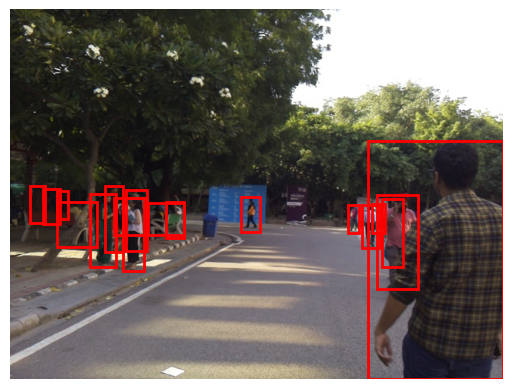

In [9]:


# Visualize one image's bounding boxes
image_id = list(coco.imgs.keys())[10]
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(train_dir, image_info['file_name'])
# image_path='/content/drive/MyDrive/extracted_dataset/train/1038.jpg'
image = cv2.imread(image_path)

# Load annotations for the image
ann_ids = coco.getAnnIds(imgIds=image_info['id'])
anns = coco.loadAnns(ann_ids)

# Plot image and overlay bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

for ann in anns:
    bbox = ann['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()


In [10]:
# !gdown --id '1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_' --output /content/drive/MyDrive/checkpoint0011_4scale.pth


In [11]:
!chmod +x /content/DINO/scripts/DINO_eval.sh

In [12]:
%cd /content/DINO/models/dino/ops

/content/DINO/models/dino/ops


In [13]:
%cd models/dino/ops
!python setup.py build install
# unit test (should see all checking is True)
!python test.py
%cd ../../..

[Errno 2] No such file or directory: 'models/dino/ops'
/content/DINO/models/dino/ops
running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/functions
copying functions/__init__.py -> build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/functions
creating build/lib.linux-x86_64-cpython-310/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-cpython-310/modules
copying modules/__init__.py -> build/lib.linux-x86_64-cpython-310/modules
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA

- pycocotools and cocoeval np.float

In [17]:
!/content/DINO/scripts/DINO_eval.sh /content/drive/MyDrive/CVProject/dataset /content/drive/MyDrive/CVProject/checkpoint0011_4scale.pth


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/23 19:07:13.584]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: has uncommited changes, branch: main

[09/23 19:07:13.584]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/CVProject/dataset --eval --resume /content/drive/MyDrive/CVProject/checkpoint0011_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/23 19:07:13.585]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/23 19:07:13.585]: world size: 1
[09/23 19:07:13.585]: rank: 0
[09/23 19:07:13.585]: local_rank: 0
[09/23 19:07:13.585]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/driv